# Описание проекта


Вы работаете в интернет-магазине «Стримчик», который продаёт по всему миру компьютерные игры. Из открытых источников доступны исторические данные о продажах игр, оценки пользователей и экспертов, жанры и платформы (например, Xbox или PlayStation). Вам нужно выявить определяющие успешность игры закономерности. Это позволит сделать ставку на потенциально популярный продукт и спланировать рекламные кампании

# Содержание 
1. **Изучение общей информации**
* Общие вопросы
* Вопросы по датасету
2. **Подготовка данных**
* Приведение к нижнему регистру названия столбцов
* Преобразование данных в нужные типы. Описание, в каких столбцах заменили тип данных и почему
* Обработка пропусков
* Посчет суммарных продаж во всех регионах и запись их в отдельный столбец
3. **Исследовательский анализ данных**
* Анализ, сколько игр выпускалось в разные годы. Вывод о нужности данных за весь период
* Анализ, как менялись продажи по платформам. Выбор платформы с наибольшими суммарными продажами и построение распределения по годам. Вывод о характерном сроке появления новых и исчезновении старых платформ
* Выборка данных за соответствующий актуальный период, без учета данных за предыдущие годы
* Анализ платформ которые лидируют по продажам, растут или падают. Выбор нескольких потенциально прибыльных платформ
* Построение графика «ящик с усами» по глобальным продажам игр в разбивке по платформам. Описан результат
* Построение диаграммы рассеяния и подсчет корреляции между отзывами и продажами. Сформулирован вывод
* Анализ общего распределения игр по жанрам 
4. **Портрет пользователя каждого региона(NA, EU, JP)**
5. **Проверка гипотез**
* Средние пользовательские рейтинги платформ Xbox One и PC одинаковые
* Средние пользовательские рейтинги жанров Action и Sports разные
6. **Общий вывод**

1.**Изучение общей информации**

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from datetime import datetime
from scipy import stats as st

In [2]:
pd.options.mode.chained_assignment = None
df = pd.read_csv('/datasets/games.csv')
df.head(10)

Name Platform  Year_of_Release         Genre  \
0                 Wii Sports      Wii           2006.0        Sports   
1          Super Mario Bros.      NES           1985.0      Platform   
2             Mario Kart Wii      Wii           2008.0        Racing   
3          Wii Sports Resort      Wii           2009.0        Sports   
4   Pokemon Red/Pokemon Blue       GB           1996.0  Role-Playing   
5                     Tetris       GB           1989.0        Puzzle   
6      New Super Mario Bros.       DS           2006.0      Platform   
7                   Wii Play      Wii           2006.0          Misc   
8  New Super Mario Bros. Wii      Wii           2009.0      Platform   
9                  Duck Hunt      NES           1984.0       Shooter   

   NA_sales  EU_sales  JP_sales  Other_sales  Critic_Score User_Score Rating  
0     41.36     28.96      3.77         8.45          76.0          8      E  
1     29.08      3.58      6.81         0.77           NaN        NaN    NaN  
2     15.68     12.76      3.79         3.29          82.0        8.3      E  
3     15.61     10.93      3.28         2.95          80.0          8      E  
4     11.27      8.89     10.22         1.00           NaN        NaN    NaN  
5     23.20      2.26      4.22         0.58           NaN        NaN    NaN  
6     11.28      9.14      6.50         2.88          89.0        8.5      E  
7     13.96      9.18      2.93         2.84          58.0        6.6      E  
8     14.44      6.94      4.70         2.24          87.0        8.4      E  
9     26.93      0.63      0.28         0.47           NaN        NaN    NaN

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16713 non-null  object 
 1   Platform         16715 non-null  object 
 2   Year_of_Release  16446 non-null  float64
 3   Genre            16713 non-null  object 
 4   NA_sales         16715 non-null  float64
 5   EU_sales         16715 non-null  float64
 6   JP_sales         16715 non-null  float64
 7   Other_sales      16715 non-null  float64
 8   Critic_Score     8137 non-null   float64
 9   User_Score       10014 non-null  object 
 10  Rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


In [4]:
df.describe()

Year_of_Release      NA_sales      EU_sales      JP_sales  \
count     16446.000000  16715.000000  16715.000000  16715.000000   
mean       2006.484616      0.263377      0.145060      0.077617   
std           5.877050      0.813604      0.503339      0.308853   
min        1980.000000      0.000000      0.000000      0.000000   
25%        2003.000000      0.000000      0.000000      0.000000   
50%        2007.000000      0.080000      0.020000      0.000000   
75%        2010.000000      0.240000      0.110000      0.040000   
max        2016.000000     41.360000     28.960000     10.220000   

        Other_sales  Critic_Score  
count  16715.000000   8137.000000  
mean       0.047342     68.967679  
std        0.186731     13.938165  
min        0.000000     13.000000  
25%        0.000000     60.000000  
50%        0.010000     71.000000  
75%        0.030000     79.000000  
max       10.570000     98.000000

Необходимо: 
1. Привести названия столбцов к нижнему регистру
2. Столбец Year_of_Release привети к типу int
3. Столбец User_Score к float
4. Обработать пропуски

2. **Подготовка данных**

* Приведение к нижнему регистру названия столбцов

In [5]:
df.columns = df.columns.str.lower()

In [6]:
df.head(2)

name platform  year_of_release     genre  na_sales  eu_sales  \
0         Wii Sports      Wii           2006.0    Sports     41.36     28.96   
1  Super Mario Bros.      NES           1985.0  Platform     29.08      3.58   

   jp_sales  other_sales  critic_score user_score rating  
0      3.77         8.45          76.0          8      E  
1      6.81         0.77           NaN        NaN    NaN

* Преобразование данных в нужные типы. Описание, в каких столбцах заменили тип данных и почему

Столбец year_of_release приведем к int, потому как он отображает года, дроби тут ни к чему

In [7]:
#Столбец приветем к int, потому как он отображает год
df['year_of_release'] = pd.to_numeric(df['year_of_release'], errors='coerce').astype('Int64')

In [8]:
#Посмотрим уникальные значения
df['user_score'].unique()

array(['8', nan, '8.3', '8.5', '6.6', '8.4', '8.6', '7.7', '6.3', '7.4',
       '8.2', '9', '7.9', '8.1', '8.7', '7.1', '3.4', '5.3', '4.8', '3.2',
       '8.9', '6.4', '7.8', '7.5', '2.6', '7.2', '9.2', '7', '7.3', '4.3',
       '7.6', '5.7', '5', '9.1', '6.5', 'tbd', '8.8', '6.9', '9.4', '6.8',
       '6.1', '6.7', '5.4', '4', '4.9', '4.5', '9.3', '6.2', '4.2', '6',
       '3.7', '4.1', '5.8', '5.6', '5.5', '4.4', '4.6', '5.9', '3.9',
       '3.1', '2.9', '5.2', '3.3', '4.7', '5.1', '3.5', '2.5', '1.9', '3',
       '2.7', '2.2', '2', '9.5', '2.1', '3.6', '2.8', '1.8', '3.8', '0',
       '1.6', '9.6', '2.4', '1.7', '1.1', '0.3', '1.5', '0.7', '1.2',
       '2.3', '0.5', '1.3', '0.2', '0.6', '1.4', '0.9', '1', '9.7'],
      dtype=object)

In [9]:
#Посмотрим столбцы с 'tbd'
df[df['user_score'] == 'tbd'].head(5)

name platform  year_of_release  \
119                             Zumba Fitness      Wii             2010   
301            Namco Museum: 50th Anniversary      PS2             2005   
520                           Zumba Fitness 2      Wii             2011   
645                              uDraw Studio      Wii             2010   
657  Frogger's Adventures: Temple of the Frog      GBA             <NA>   

         genre  na_sales  eu_sales  jp_sales  other_sales  critic_score  \
119     Sports      3.45      2.59       0.0         0.66           NaN   
301       Misc      2.08      1.35       0.0         0.54          61.0   
520     Sports      1.51      1.03       0.0         0.27           NaN   
645       Misc      1.65      0.57       0.0         0.20          71.0   
657  Adventure      2.15      0.18       0.0         0.07          73.0   

    user_score rating  
119        tbd      E  
301        tbd   E10+  
520        tbd      T  
645        tbd      E  
657        tbd      E

В столбце user_score есть "nan" и "tbt". "Tbt" это "To Be Determined", то есть "Будет определено", судя по годам выпуска это старые игры, в которых наверняка не учитывались оценки пользователей. Заменим его на Nan. Соответственно остальное оставляем все как есть, только изменим тип данных на 'float64'. 

In [10]:
#Посмотрим сколько Nan было до изменения
print("В 'user_score' Nan было =", df['user_score'].isna().sum())

В 'user_score' Nan было = 6701


In [11]:
#Изменим 'tbd' на Nan
df.loc[df['user_score'] == 'tbd', 'user_score'] =np.nan
df['user_score'] = df['user_score'].astype('float64').round(1)

In [12]:
#Посмотрим сколько Nan будет после изменения
print("В 'user_score' Nan стало =", df['user_score'].isna().sum())

В 'user_score' Nan стало = 9125


In [13]:
#Посмотрим данные в столбце critic_score
df['critic_score'].unique()

array([76., nan, 82., 80., 89., 58., 87., 91., 61., 97., 95., 77., 88.,
       83., 94., 93., 85., 86., 98., 96., 90., 84., 73., 74., 78., 92.,
       71., 72., 68., 62., 49., 67., 81., 66., 56., 79., 70., 59., 64.,
       75., 60., 63., 69., 50., 25., 42., 44., 55., 48., 57., 29., 47.,
       65., 54., 20., 53., 37., 38., 33., 52., 30., 32., 43., 45., 51.,
       40., 46., 39., 34., 35., 41., 36., 28., 31., 27., 26., 19., 23.,
       24., 21., 17., 22., 13.])

Итог преобразования: 
* в столбце year_of_release убрали дроби, потому как это год выпуска. 
* в стобце user_score нашли абривиатуру "tbt", заменили ее на Nan. 
* в столбце critic_score оставили все как есть, "Nan" заменять нечем. 


In [14]:
#Посмотрим значения в столбце user_score
df['user_score'].unique()

array([8. , nan, 8.3, 8.5, 6.6, 8.4, 8.6, 7.7, 6.3, 7.4, 8.2, 9. , 7.9,
       8.1, 8.7, 7.1, 3.4, 5.3, 4.8, 3.2, 8.9, 6.4, 7.8, 7.5, 2.6, 7.2,
       9.2, 7. , 7.3, 4.3, 7.6, 5.7, 5. , 9.1, 6.5, 8.8, 6.9, 9.4, 6.8,
       6.1, 6.7, 5.4, 4. , 4.9, 4.5, 9.3, 6.2, 4.2, 6. , 3.7, 4.1, 5.8,
       5.6, 5.5, 4.4, 4.6, 5.9, 3.9, 3.1, 2.9, 5.2, 3.3, 4.7, 5.1, 3.5,
       2.5, 1.9, 3. , 2.7, 2.2, 2. , 9.5, 2.1, 3.6, 2.8, 1.8, 3.8, 0. ,
       1.6, 9.6, 2.4, 1.7, 1.1, 0.3, 1.5, 0.7, 1.2, 2.3, 0.5, 1.3, 0.2,
       0.6, 1.4, 0.9, 1. , 9.7])

* Обработка пропусков

In [15]:
#посмотрим суммы нулей в столбцах
df.isna().sum() 

name                  2
platform              0
year_of_release     269
genre                 2
na_sales              0
eu_sales              0
jp_sales              0
other_sales           0
critic_score       8578
user_score         9125
rating             6766
dtype: int64

<AxesSubplot:>

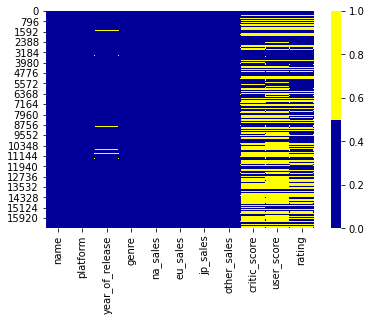

In [16]:
#на графике видны 3 лидера по незаполненным столбцам
cols = df.columns[:30]
colours = ['#000099', '#ffff00'] 
sns.heatmap(df[cols].isnull(), cmap=sns.color_palette(colours)) 

In [17]:
#посмотрим процент незаполненных данных по столбцам
for col in df.columns:
    pct_missing = np.mean(df[col].isnull())
    print('{} - {}%'.format(col, round(pct_missing*100))) 

name - 0%
platform - 0%
year_of_release - 2%
genre - 0%
na_sales - 0%
eu_sales - 0%
jp_sales - 0%
other_sales - 0%
critic_score - 51%
user_score - 55%
rating - 40%


In [18]:
#посмотрим количество строк
print(df.shape)

(16715, 11)


In [19]:
#уберем незаполненные строки из столбца year_of_release, они составляют всего 2%
df=df.dropna(subset=['year_of_release']) 

In [20]:
#посмотрим количество строк после удаления
print(df.shape)

(16446, 11)


In [21]:
#перепроверим результат
for col in df.columns:
    pct_missing = np.mean(df[col].isnull())
    print('{} - {}%'.format(col, round(pct_missing*100))) 

name - 0%
platform - 0%
year_of_release - 0%
genre - 0%
na_sales - 0%
eu_sales - 0%
jp_sales - 0%
other_sales - 0%
critic_score - 51%
user_score - 55%
rating - 41%


In [22]:
#заполним пропуски в столбце рейтинг абривиатурой "RP"(Rating Pending-Рейтинг ожидается.)
df['rating'] = df['rating'].fillna('RP') 
df['rating'].unique() 

array(['E', 'RP', 'M', 'T', 'E10+', 'K-A', 'AO', 'EC'], dtype=object)

Пропуски в столбцах critic_score, user_score и rating заполнять не будем, потому как заполнить средней или медианой будет не совсем верно. Опираться допустим на столбец с продажами тоже не верно, может игру купили, но она не понравилась. Устанавливать рейтинг тоже неверно, потому как он устанавливается вообще организацией ESRB имеющей свои определенные критерии.

Проверим неявные дубликаты в названиях населённых пунктов

In [23]:
#Сумма дубликатов
df.duplicated().sum()

0

In [24]:
#проверим столбец name
df['name'].unique()

array(['Wii Sports', 'Super Mario Bros.', 'Mario Kart Wii', ...,
       'Woody Woodpecker in Crazy Castle 5', 'LMA Manager 2007',
       'Haitaka no Psychedelica'], dtype=object)

In [25]:
#проверим столбец platform
df['platform'].unique()

array(['Wii', 'NES', 'GB', 'DS', 'X360', 'PS3', 'PS2', 'SNES', 'GBA',
       'PS4', '3DS', 'N64', 'PS', 'XB', 'PC', '2600', 'PSP', 'XOne',
       'WiiU', 'GC', 'GEN', 'DC', 'PSV', 'SAT', 'SCD', 'WS', 'NG', 'TG16',
       '3DO', 'GG', 'PCFX'], dtype=object)

Дубликатов нет. Оставляем все как есть. 

* Посчет суммарных продаж во всех регионах и запись их в отдельный столбец

In [26]:
#добавим столбец с общей суммой продаж
df['sum_sales'] = df['na_sales'] + df['eu_sales'] + df['jp_sales'] + df['other_sales']
df

name platform  year_of_release         genre  \
0                         Wii Sports      Wii             2006        Sports   
1                  Super Mario Bros.      NES             1985      Platform   
2                     Mario Kart Wii      Wii             2008        Racing   
3                  Wii Sports Resort      Wii             2009        Sports   
4           Pokemon Red/Pokemon Blue       GB             1996  Role-Playing   
...                              ...      ...              ...           ...   
16710  Samurai Warriors: Sanada Maru      PS3             2016        Action   
16711               LMA Manager 2007     X360             2006        Sports   
16712        Haitaka no Psychedelica      PSV             2016     Adventure   
16713               Spirits & Spells      GBA             2003      Platform   
16714            Winning Post 8 2016      PSV             2016    Simulation   

       na_sales  eu_sales  jp_sales  other_sales  critic_score  user_score  \
0         41.36     28.96      3.77         8.45          76.0         8.0   
1         29.08      3.58      6.81         0.77           NaN         NaN   
2         15.68     12.76      3.79         3.29          82.0         8.3   
3         15.61     10.93      3.28         2.95          80.0         8.0   
4         11.27      8.89     10.22         1.00           NaN         NaN   
...         ...       ...       ...          ...           ...         ...   
16710      0.00      0.00      0.01         0.00           NaN         NaN   
16711      0.00      0.01      0.00         0.00           NaN         NaN   
16712      0.00      0.00      0.01         0.00           NaN         NaN   
16713      0.01      0.00      0.00         0.00           NaN         NaN   
16714      0.00      0.00      0.01         0.00           NaN         NaN   

      rating  sum_sales  
0          E      82.54  
1         RP      40.24  
2          E      35.52  
3          E      32.77  
4         RP      31.38  
...      ...        ...  
16710     RP       0.01  
16711     RP       0.01  
16712     RP       0.01  
16713     RP       0.01  
16714     RP       0.01  

[16446 rows x 12 columns]

3. **Исследовательский анализ данных**

* Анализ, сколько игр выпускалось в разные годы. Вывод о нужности данных за весь период

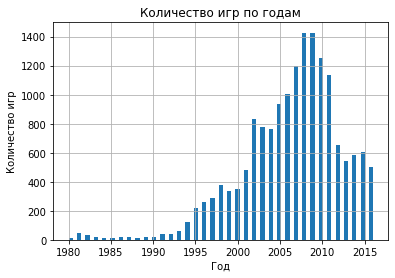

In [27]:
#построим гистрограмму для анализа выпуска игр относительно года
df['year_of_release'].plot(kind='hist', bins=73, grid=True)
plt.xlabel('Год')
plt.ylabel('Количество игр')
plt.title('Количество игр по годам')
figsize=[20, 10]

До 1995г не было большого количества платформ и соответственно игр. Возможно не велась статистика в полной мере.

Text(0.5, 1.0, 'Количество игр по годам')

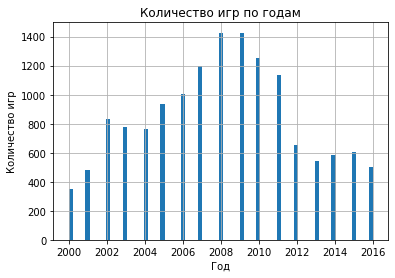

In [28]:
#построим гистограмму для анализа кличества игр с 2000г
year_2000of_release = df.query('year_of_release >=2000')
year_2000of_release['year_of_release'].plot(kind='hist', bins=73, grid=True)
plt.xlabel('Год')
plt.ylabel('Количество игр')
plt.title('Количество игр по годам')

Самый пик приходится на 2008-2009года. Потребитель готов пробовать новые игры. Но с 2012 виден спад, пользователи уже определились на какой платформе и в какую игру хотят играть. С этого периода разработчики наверняка начали непосредственно улучшать саму игру. В конце 2013г. вышел четвертый PlayStation и соответственно в начале 2014 вышло несколько новых игр, остальные же производители наверняка не стали отставать. Для планирования 2017года не нужно брать весь период из данных, потому как сфера пришла в ремиссию по количеству игр. Нужно выбрать последние три года.

* Анализ, как менялись продажи по платформам. Выбор платформы с наибольшими суммарными продажами и построение распределения по годам. Вывод о характерном сроке появления новых и исчезновении старых платформ

In [29]:
#выведем таблицу для анализа продж по платформам
platform_sale = df.pivot_table(index=['platform', 'year_of_release'],
                                       values='sum_sales', aggfunc='sum')
platform_sale

sum_sales
platform year_of_release           
2600     1980                 11.38
         1981                 35.68
         1982                 28.88
         1983                  5.84
         1984                  0.27
...                             ...
XB       2008                  0.18
XOne     2013                 18.96
         2014                 54.07
         2015                 60.14
         2016                 26.15

[238 rows x 1 columns]

У большинства в начале взлет, а потом с каждым годом падение. 

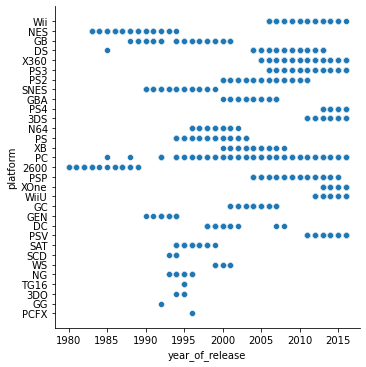

In [30]:
#Построим график для просмотра периодов существования платформ
sns.relplot(data = df
            ,y = 'platform'
            ,x = 'year_of_release'        
            )

В большинстве случаев платформы существуют три-пять лет. 

In [31]:
#выведем топ 5 платформ по уровню продаж
platform_sale_top = df.pivot_table(index='platform', values='sum_sales', aggfunc='sum')\
.sort_values(by='sum_sales', ascending=False).head(5)
platform_sale_top.reset_index()

platform  sum_sales
0      PS2    1233.56
1     X360     961.24
2      PS3     931.34
3      Wii     891.18
4       DS     802.78

Топ 5 платформ с наибольшими продажами: PS2, X360, PS3, Wii, DS	     

* Выборка данных за соответствующий актуальный период, без учета данных за предыдущие годы

In [32]:
#выбрали период с2014г по 2016г
df_actual = df.query('year_of_release >= 2014 and year_of_release <= 2016')

Text(0.5, 1.0, 'Количество игр по годам')

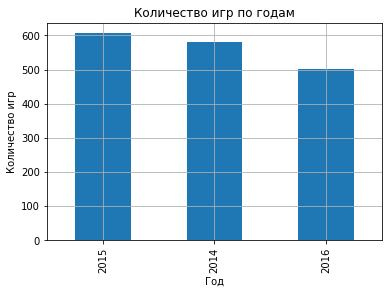

In [33]:
#посмотрим график за выбранный период
df_actual['year_of_release'].value_counts().plot(kind='bar', grid=True)
plt.xlabel('Год')
plt.ylabel('Количество игр')
plt.title('Количество игр по годам')

* Анализ платформ которые лидируют по продажам, растут или падают. Выбор нескольких потенциально прибыльных платформ

In [34]:
#посмотрим топ 5 платформ по продажам
platform_sale_top = df_actual.pivot_table(index='platform', values='sum_sales', aggfunc='sum')\
.sort_values(by='sum_sales', ascending=False).head(5)
platform_sale_top.reset_index()

platform  sum_sales
0      PS4     288.15
1     XOne     140.36
2      3DS      86.68
3      PS3      68.18
4     X360      48.22

Text(0.5, 1.0, 'Топ 5 платформ по суммам продаж')

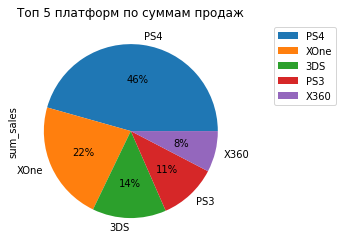

In [35]:
#график топ 5 платформ по продажам
platform_sale_top.plot(kind='pie', label="", subplots=True, autopct='%1.0f%%')
plt.legend(bbox_to_anchor=(1.3, 1), loc='upper center')
plt.title('Топ 5 платформ по суммам продаж')

По суммам продаж выделяются платформы: PS4, XOne, 3DS, PS3, X360, . Самые высокие продажи у PS4-46%. У них один производитель Sony, поэтому они по праву считаются топ производителями. Далее идут XOne производителя Microsoft. На третьем месте 3DS производителя Nintendo. Таким образом становится понятно что в последние годы в индустрии есть один явный лидер по продажам это PS4.

Text(0.5, 1.0, 'Анализ продаж PS4')

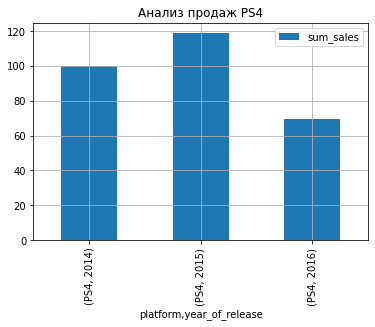

In [36]:
analis_top = df_actual.pivot_table(index=['platform', 'year_of_release'],
                                       values='sum_sales', aggfunc='sum')
analis_top.query('platform == "PS4"').plot(kind='bar', grid=True)
plt.title('Анализ продаж PS4')

Text(0.5, 1.0, 'Анализ продаж PS3')

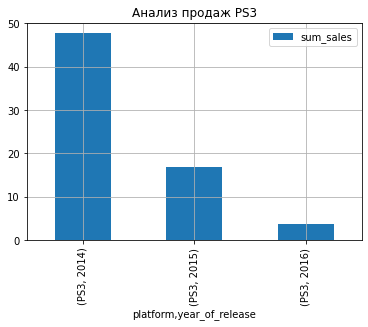

In [37]:
analis_top.query('platform == "PS3"').plot(kind='bar', grid=True)
plt.title('Анализ продаж PS3')

Text(0.5, 1.0, 'Анализ продаж X360')

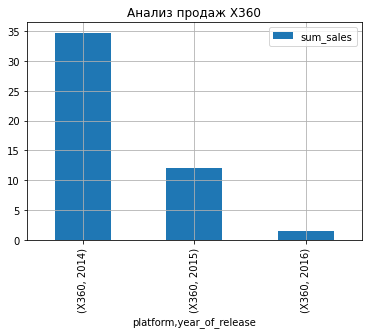

In [38]:
analis_top.query('platform == "X360"').plot(kind='bar', grid=True)
plt.title('Анализ продаж X360')

Text(0.5, 1.0, 'Анализ продаж XOne')

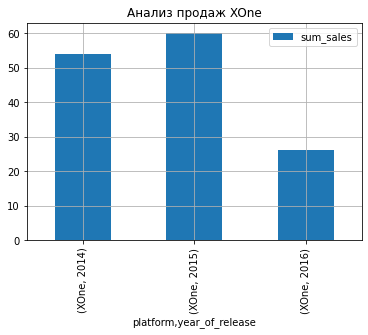

In [39]:
analis_top.query('platform == "XOne"').plot(kind='bar', grid=True)
plt.title('Анализ продаж XOne')

Text(0.5, 1.0, 'Анализ продаж 3DS')

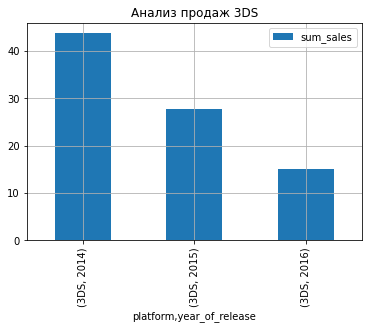

In [40]:
analis_top.query('platform == "3DS"').plot(kind='bar', grid=True)
plt.title('Анализ продаж 3DS')

Рост продаж наблюдается всего лишь у двух платформ: PS4 и XOne. Это последние свежие платформы у производителей Sony и Microsoft. У остальных наблюдается спад, платформы устарели и потеряли интерес у покупателя. 

* Построение графика «ящик с усами» по глобальным продажам игр в разбивке по платформам. Описан результат

(0.0, 3.0)

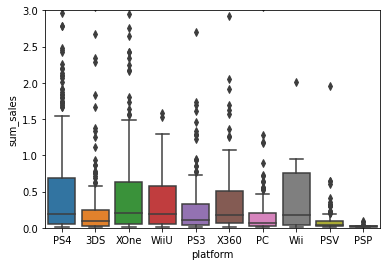

In [41]:
sns.boxplot(data=df_actual, x='platform', y='sum_sales')
plt.ylim(0,3)

(0.0, 0.85)

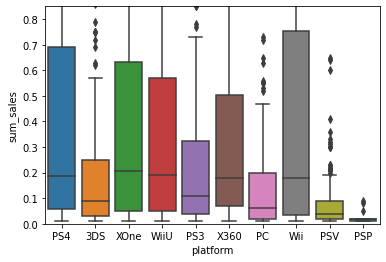

In [42]:

sns.boxplot(data=df_actual, x='platform', y='sum_sales')
plt.ylim(0,0.85)


In [43]:
df_actual.describe()

year_of_release     na_sales     eu_sales     jp_sales  other_sales  \
count      1689.000000  1689.000000  1689.000000  1689.000000  1689.000000   
mean       2014.953227     0.168182     0.160261     0.055115     0.048324   
std           0.799624     0.446134     0.466846     0.211513     0.141790   
min        2014.000000     0.000000     0.000000     0.000000     0.000000   
25%        2014.000000     0.000000     0.000000     0.000000     0.000000   
50%        2015.000000     0.020000     0.020000     0.010000     0.010000   
75%        2016.000000     0.120000     0.120000     0.040000     0.040000   
max        2016.000000     6.030000     6.310000     3.180000     2.380000   

       critic_score  user_score    sum_sales  
count    718.000000  888.000000  1689.000000  
mean      72.306407    6.623536     0.431883  
std       12.213500    1.589792     1.056109  
min       19.000000    0.200000     0.010000  
25%       66.000000    5.800000     0.030000  
50%       74.000000    7.000000     0.100000  
75%       81.000000    7.800000     0.350000  
max       97.000000    9.300000    14.630000

Медианa'PS4' немного ниже 'XOne', соответсвенно они примерно в одном ценовом диапазане. Хоть и продажи'PS4' самые большие, но судя по предыдущей платформе('PS3') им получилость получить такой успех не за опыт прошлых лет. Если посмотреть на медианы 'XOne' и 'X360', то это действительно опыт прошлых лет, потому как уровень медианы 'X360' не на много ниже 'XOne'. 

* Построение диаграммы рассеяния и подсчет корреляции между отзывами и продажами. Сформулирован вывод

Кореляция оценка критиков 0.328105086966363


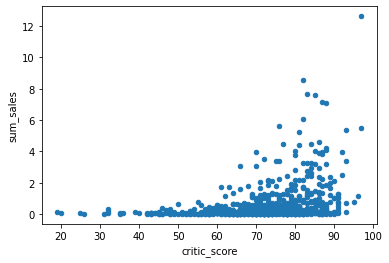

In [44]:
#кореляция по отзывам критиков
df_actual.plot(x='critic_score', y='sum_sales', kind='scatter')
cor_cr = df_actual['sum_sales'].corr(df_actual['critic_score'])
print('Кореляция оценка критиков', cor_cr)

Кореляция оценка пользователей -0.013070305002484585


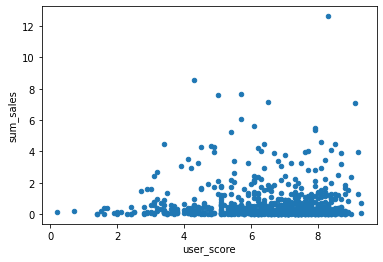

In [45]:
#кореляция по отзывам пользователей
df_actual.plot(x='user_score', y='sum_sales', kind='scatter')
cor_us = df_actual['sum_sales'].corr(df_actual['user_score'])
print('Кореляция оценка пользователей', cor_us)

Кореляции оценок пользователей с продажами нет. Кореляция оценок критиков демонстрирует слабую корреляцию с продажами. 

* Анализ общего распределения игр по жанрам

Посмотрите на общее распределение игр по жанрам. Что можно сказать о самых прибыльных жанрах? Выделяются ли жанры с высокими и низкими продажами?

In [46]:
#Посмотрим проаджи игр по жанрам
genre_sale_top = df_actual.pivot_table(index='genre', values='sum_sales', aggfunc='sum').sort_values(by='sum_sales', ascending=False)
genre_sale_top.reset_index()

genre  sum_sales
0         Action     199.36
1        Shooter     170.94
2         Sports     109.48
3   Role-Playing     101.44
4           Misc      37.55
5       Fighting      28.22
6         Racing      27.52
7       Platform      18.09
8      Adventure      17.55
9     Simulation      13.13
10      Strategy       3.96
11        Puzzle       2.21

Text(0.5, 1.0, 'Топ 5 жанров по суммам продаж')

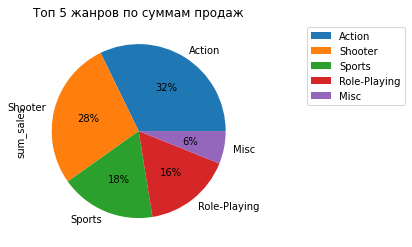

In [47]:
#график продаж по жанрам
genre_sale_top = genre_sale_top.head(5)
genre_sale_top.plot(kind='pie', label="", subplots=True, autopct='%1.0f%%')
plt.legend(bbox_to_anchor=(1.5, 1), loc='upper center')
plt.title('Топ 5 жанров по суммам продаж')

Топ самых продаваемых игр относятся к жанрам: Action,Shooter,Sports. Самые не популярные: Strategy, Puzzle. Посмотрим медианы по всем жанрам

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11]),
 [Text(0, 0, 'Shooter'),
  Text(1, 0, 'Action'),
  Text(2, 0, 'Role-Playing'),
  Text(3, 0, 'Sports'),
  Text(4, 0, 'Fighting'),
  Text(5, 0, 'Racing'),
  Text(6, 0, 'Misc'),
  Text(7, 0, 'Platform'),
  Text(8, 0, 'Simulation'),
  Text(9, 0, 'Adventure'),
  Text(10, 0, 'Puzzle'),
  Text(11, 0, 'Strategy')])

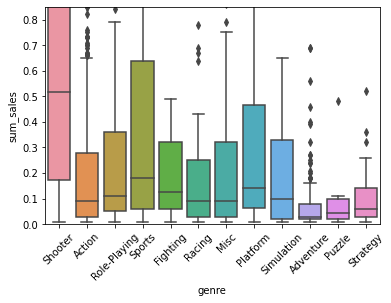

In [48]:
#построим ящики с усами для всех жанров
sns.boxplot(data=df_actual, x='genre', y='sum_sales')
plt.ylim(0,0.85)
plt.xticks(rotation=45)

Медиана учитывает не только слишком большие\маленькие значения относительно среднего, но и их количество. Самая высокая медиана у 'Shooter'соответсвенно это самый успешный жанр который приносит стабильный доход. 

<AxesSubplot:xlabel='genre,year_of_release'>

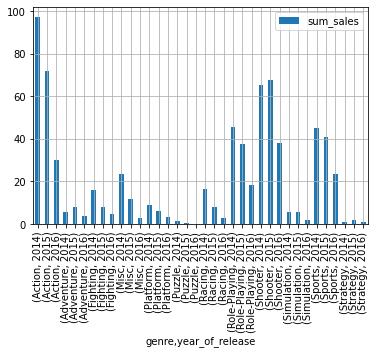

In [49]:
analis_genre = df_actual.pivot_table(index=['genre', 'year_of_release'],
                                       values='sum_sales', aggfunc='sum')
analis_genre.plot(kind='bar', grid=True)

Продажи по всем платформам с каждым годом падают. 

4. **Портрет пользователя каждого региона(NA, EU, JP)**

Определим для пользователя каждого региона топ 5 платформ и жанров игр. А так же влияние рейтинга на продажи. 

In [50]:
#топ платформ в Северной Америке
platform_sale_top_na = df_actual.pivot_table(index='platform', values='na_sales', aggfunc='sum')\
.sort_values(by='na_sales', ascending=False).head(5)
platform_sale_top_na

na_sales
platform          
PS4          98.61
XOne         81.27
X360         28.30
3DS          22.64
PS3          22.05

В Северной Америке лидируют PS4, XOne, X360, 3DS и PS3. Топ-PS4.

In [51]:
#топ платформ в Европе
platform_sale_top_eu = df_actual.pivot_table(index='platform', values='eu_sales', aggfunc='sum')\
.sort_values(by='eu_sales', ascending=False).head(5)
platform_sale_top_eu

eu_sales
platform          
PS4         130.04
XOne         46.25
PS3          25.54
PC           17.97
3DS          16.12

В Европе растановка приоритетов по платформам такова: PS4, XOne, PS3, PS, 3DS. Топ-PS4   

In [52]:
#топ платформ в Японии
platform_sale_top_jp = df_actual.pivot_table(index='platform', values='jp_sales', aggfunc='sum')\
.sort_values(by='jp_sales', ascending=False).head(5)
platform_sale_top_jp

jp_sales
platform          
3DS          44.24
PS4          15.02
PSV          14.54
PS3          11.22
WiiU          7.31

В Японии топ платформ: 3DS, PS4, PSV, PS3, WiiU. Топ-3DS.  

In [53]:
#топ жанров в Северной Америке 
genre_sale_top_na = df_actual.pivot_table(index='genre', values='na_sales', aggfunc='sum')\
.sort_values(by='na_sales', ascending=False).head(5)
genre_sale_top_na.reset_index()

genre  na_sales
0       Shooter     79.02
1        Action     72.53
2        Sports     46.13
3  Role-Playing     33.47
4          Misc     15.05

В Северной америке игроки отдают предпочтение жанрам: Shooter, Action, Sports, Role-Playing и Misc. Топ -Shooter 

In [54]:
#топ жанров в Европе
genre_sale_top_eu = df_actual.pivot_table(index='genre', values='eu_sales', aggfunc='sum')\
.sort_values(by='eu_sales', ascending=False).head(5)
genre_sale_top_eu.reset_index()

genre  eu_sales
0        Action     74.68
1       Shooter     65.52
2        Sports     45.73
3  Role-Playing     28.17
4        Racing     14.13

В Европе игроки предпочитают Action,Shooter,Sports,Role-Playing	и Racing. 	

In [55]:
#топ жанров в Японии
genre_sale_top_jp = df_actual.pivot_table(index='genre', values='jp_sales', aggfunc='sum')\
.sort_values(by='jp_sales', ascending=False).head(5)
genre_sale_top_jp.reset_index()

genre  jp_sales
0  Role-Playing     31.16
1        Action     29.58
2      Fighting      6.37
3          Misc      5.61
4       Shooter      4.87

В Японии игроки отдают предпочтение жанрам: Role-Playing, Action, Fighting, Misc и Shooter. 		 	

<AxesSubplot:>

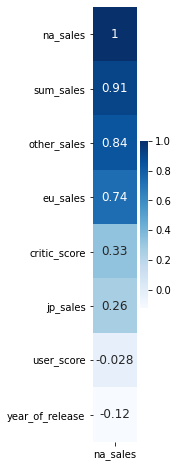

In [56]:
#Кореляция по суммам продаж в Северной Америке
plt.figure(figsize=(1,8))
sns.heatmap(df_actual.corr()[['na_sales']].sort_values(by='na_sales', ascending=False), cmap="Blues", 
            annot=True, annot_kws={'size':12}) 

Кореляция оценка критиков на продажи СА 0.333305881327296


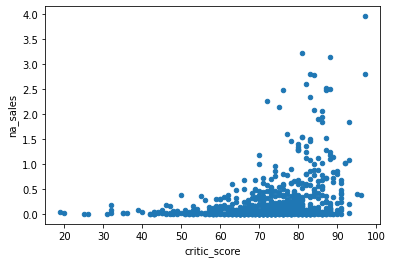

In [57]:
#кореляция по отзывам критиков
df_actual.plot(x='critic_score', y='na_sales', kind='scatter')
cor_cr = df_actual['na_sales'].corr(df_actual['critic_score'])
print('Кореляция оценка критиков на продажи СА', cor_cr)

Кореляция оценка игроков на продажи СА -0.028257728474489967


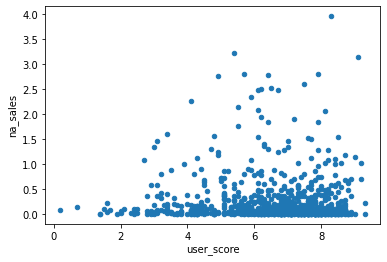

In [58]:
#кореляция по отзывам игроков
df_actual.plot(x='user_score', y='na_sales', kind='scatter')
cor_cr = df_actual['na_sales'].corr(df_actual['user_score'])
print('Кореляция оценка игроков на продажи СА', cor_cr)

Кореляция по оценкам критиков в Северной Америке положительная и довольно слабая (0,33), а вот кореляция по оценкам пользователей отрицательная(-0,02), она слабая, но всеже указывает на то, что чем больше будет отзывов, тем меньше суммы продаж. 

<AxesSubplot:>

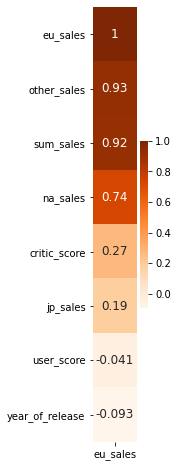

In [59]:
#Кореляция по суммам продаж в Европе
plt.figure(figsize=(1,8))
sns.heatmap(df_actual.corr()[['eu_sales']].sort_values(by='eu_sales', ascending=False), cmap="Oranges", 
            annot=True, annot_kws={'size':12})

Кореляция оценка критиков на продажи Европа 0.2708256036129555


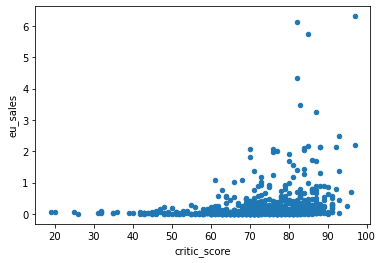

In [60]:
#кореляция по отзывам критиков
df_actual.plot(x='critic_score', y='eu_sales', kind='scatter')
cor_cr = df_actual['eu_sales'].corr(df_actual['critic_score'])
print('Кореляция оценка критиков на продажи Европа', cor_cr)

Кореляция оценка игроков на продажи Европа -0.040984972369787584


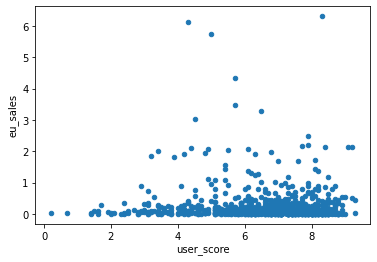

In [61]:
#кореляция по отзывам игроков
df_actual.plot(x='user_score', y='eu_sales', kind='scatter')
cor_cr = df_actual['eu_sales'].corr(df_actual['user_score'])
print('Кореляция оценка игроков на продажи Европа', cor_cr)

Кореляция по оценкам критиков в Европе положительная и довольно слабая (0,27), а вот кореляция по оценкам пользователей отрицательная(-0,04), она слабая, но всеже указывает на то, что чем больше будет отзывов, тем меньше суммы продаж. 

<AxesSubplot:>

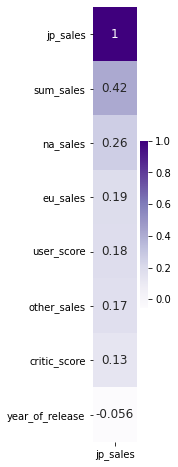

In [62]:
#Кореляция по суммам продаж в Японии
plt.figure(figsize=(1,8))
sns.heatmap(df_actual.corr()[['jp_sales']].sort_values(by='jp_sales', ascending=False), cmap="Purples", 
            annot=True, annot_kws={'size':12})

Кореляция оценка критиков на продажи Япония 0.13031600694924872


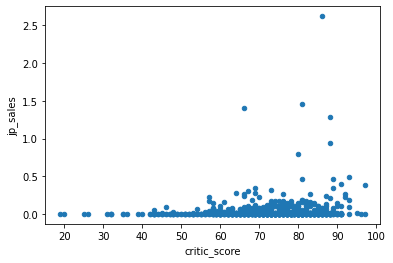

In [63]:
#кореляция по отзывам критиков
df_actual.plot(x='critic_score', y='jp_sales', kind='scatter')
cor_cr = df_actual['jp_sales'].corr(df_actual['critic_score'])
print('Кореляция оценка критиков на продажи Япония', cor_cr)

Кореляция оценка игроков на продажи Япония 0.18414093880712912


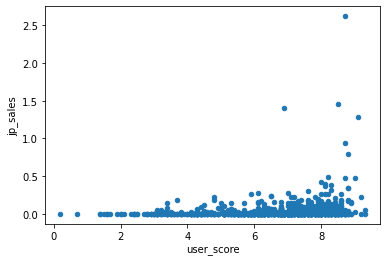

In [64]:
#кореляция по отзывам игроков
df_actual.plot(x='user_score', y='jp_sales', kind='scatter')
cor_cr = df_actual['jp_sales'].corr(df_actual['user_score'])
print('Кореляция оценка игроков на продажи Япония', cor_cr)

Кореляция по оценкам критиков и пользователей в Японии положительная и довольно слабая. Что говорит о слабой зависимости отзывов на продажи.

* Зависимость рейтинга ESRB на продажи в отдельном регионе

In [65]:
#сформируем сводную таблицу по рейтингам
df_rating = (df_actual
          .pivot_table(index='rating', values=['na_sales', 'eu_sales', 'jp_sales'],aggfunc='sum')
          )
df_rating

eu_sales  jp_sales  na_sales
rating                              
E          58.06      8.94     50.74
E10+       26.16      4.46     33.23
M          93.44      8.01     96.42
RP         58.95     56.90     64.72
T          34.07     14.78     38.95

Полная расшифровка абривиатур: 
* AO (Adults only 18+) — только для взрослых
* E - everyone - для всех
* M (Mature 17+) — от 17 лет
* T (Teen) — для подростков 13-19 лет
* K-A (Kids to Adults)— для детей и взрослых
* E10+ (Everyone 10+) — для всех старше 10 лет
* EC (Early Childhood) — для детей младшего возраста
* RP (Rating pending) — рейтинг ожидается

In [66]:
#выведем топ-5 для Северной Америки
df_actual.groupby(['rating']).agg({'na_sales':'sum'}).reset_index()\
.sort_values(by='na_sales', ascending=False).head(5)

rating  na_sales
2      M     96.42
3     RP     64.72
0      E     50.74
4      T     38.95
1   E10+     33.23

In [67]:
#выведем топ-5 для Европы
df_actual.groupby(['rating']).agg({'eu_sales':'sum'}).reset_index()\
.sort_values(by='eu_sales', ascending=False).head(5)

rating  eu_sales
2      M     93.44
3     RP     58.95
0      E     58.06
4      T     34.07
1   E10+     26.16

In [68]:
#выведем топ-5 для Японии
df_actual.groupby(['rating']).agg({'jp_sales':'sum'}).reset_index()\
.sort_values(by='jp_sales', ascending=False).head(5)

rating  jp_sales
3     RP     56.90
4      T     14.78
0      E      8.94
2      M      8.01
1   E10+      4.46

* Портрет пользователя Северной Америки: это игроки, которые чаще всего выбирают PS4,X360 или XOne. Купят игры из жанров  Action или Shooter. Не обращая толком внимания на отзывы критиков, но немного обращая на отзывы пользователей. Это будут игры для людей старше 17 лет.
* Портрет пользователя Европы чем-то сход с портретом игрока из Северной Америки. Пользователь так же выберет платформу PS4, PS3 или XOne. Купит игру жанра  Action или Shooter. Не обращая толком внимания на отзывы критиков, но немного обращая на отзывы пользователей.Это будут игры для людей старше 17 лет.
* Портрет пользователя Японии немного отличается. Пользователь выберет платформу 3DS, PS4 или PSV. Купит игру жанра Role-Playing или Action.Совсем не обратит внимания на отзывы. Это будут игры для подростков 17-19 лет.

5. **Проверка гипотез**

* Средние пользовательские рейтинги платформ Xbox One и PC одинаковые

Начнём с формулировки нулевой гипотезы H₀ - cредние пользовательские рейтинги платформ Xbox One и PC одинаковые, тогда альтернативной гипотезой H₁ будет: cредние пользовательские рейтинги платформ Xbox One и PC различаются.

In [69]:
#Сформируем данные для проверки гипотезы
xone = df_actual.query(' platform == "XOne" ')['user_score'].dropna().to_list()
pc = df_actual.query(' platform == "PC" ')['user_score'].dropna().to_list()

alpha = 0.05

results = st.ttest_ind(
    xone, 
    pc,
    nan_policy='omit', 
    equal_var = False)

print('p-значение:', results.pvalue)

if (results.pvalue < alpha):
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")

p-значение: 0.11601398086668832
Не получилось отвергнуть нулевую гипотезу


У нас нет причин утвержать что средние пользовательские рейтинги платформ Xbox One и PC значимо различаются.

* Средние пользовательские рейтинги жанров Action и Sports разные

Сформулирум нулевую гипотезу H₀ - cредние пользовательские рейтинги жанров Action и Sports одинаковые, тогда альтернативной гипотезой H₁ будет: cредние пользовательские рейтинги жанров Action и Sports различаются.

In [70]:
#Сформируем данные для проверки гипотезы
action = df_actual.query('genre == "Action"')['user_score'].dropna().to_list()
sports = df_actual.query('genre == "Sports"')['user_score'].dropna().to_list()
alpha = 0.5

results = st.ttest_ind(
    action, 
    sports, 
    equal_var = False)

print('p-значение:', results.pvalue)

if (results.pvalue < alpha):
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")

p-значение: 1.1825550382644557e-14
Отвергаем нулевую гипотезу


Отвергая нулевую гипотезу мы принимаем, что альтернативная гипотеза может быть правдой и что cредние пользовательские рейтинги жанров Action и Sports разные.

6. **Общий вывод**

До 1995г не было большого количества платформ и соответственно игр.

Самый пик приходится на 2008-2009года. Потребитель готов пробовать новые игры. Но с 2012 виден спад, пользователи уже определились на какой платформе и в какую игру хотят играть.

В большинстве случаев платформы существуют три-пять лет. 

Для планирования стратегии 2017года не нужно брать весь период из данных, потому как сфера пришла в ремиссию по количеству игр. 

Нужно выбрать последние три года для анализа.

Самые высокие продажи у PS4. Далее идут X360 и XOne производителя Microsoft. И замыкает пятерку 3DS производителя Nintendo. Таким образом становится понятно что в последние годы в индустрии есть только два топ производителя.Рост продаж наблюдается всего лишь у двух платформ: PS4 и XOne. Это последние свежие платформы у производителей Sony и Microsoft. 

Влияние оценки критиков на продажи есть, но совсем незначительное.

В то время как влияние отзывов пользователей на продажи практически нет.
Топ самых продаваемых игр относятся к жанрам: Action,Shooter. Shooter самый надежный жанр. 

Можно дать следующие рекомендации для планирования рекламных кампаний:

* ставку лучше делать на игры для приставок последних серий PS4 или XOne.
* важно учитывать региональные предпочтения к платформам и жанрам, при выходе на новый рынок.
* помнить, что чем шире возрастной рейтинг, тем больше продаж.